# Evaluation of Random Forest Model (Method 1)

In [ ]:
#Upload data & research data frame
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = r'F:\tstsaeed\ArcelorMittal_project\CoilData_cleaned.csv'
df1 = pd.read_csv(path)
path = r'F:\tstsaeed\ArcelorMittal_project\signal_labels_TR4_new.csv'
df2 = pd.read_csv(path)


Concatinating and Cleaning Data

In [3]:
df=pd.concat([df1,df2],axis=1)
df.head()

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,ma,b,n,ti,cr,va,mo,Unnamed: 0,label,score
0,0,396378,1,K371,10003,101,1302.1,1147,921,4.36,...,291,1,34,6,302,0,25,0,0,0.0
1,1,396376,3,K371,10123,101,1282.3,1150,920,4.37,...,384,1,33,12,189,25,7,1,0,0.0
2,2,396377,4,K321,10040,102,1297.4,1183,933,4.43,...,463,1,20,11,288,0,40,2,0,0.0
3,3,396379,3,K371,10243,102,1295.2,1165,910,4.44,...,296,1,21,9,253,0,9,3,0,0.0
4,4,396380,4,K321,10012,100,1293.3,1192,909,3.95,...,329,1,28,8,297,0,23,4,0,0.0


In [4]:
def clean_data(CoilData):
    #Replace *** with nan & drop them
    CoilData = CoilData.replace('^\*+$', np.NaN, regex=True)
    CoilData = CoilData.dropna()
    CoilData = CoilData.drop('Unnamed: 0',1)

    return CoilData

df = clean_data(df)
df.head()

,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,al,ma,b,n,ti,cr,va,mo,label,score
0,396378,1,K371,10003,101,1302.1,1147,921,4.36,31,...,304,291,1,34,6,302,0,25,0,0.0
1,396376,3,K371,10123,101,1282.3,1150,920,4.37,35,...,395,384,1,33,12,189,25,7,0,0.0
2,396377,4,K321,10040,102,1297.4,1183,933,4.43,25,...,476,463,1,20,11,288,0,40,0,0.0
3,396379,3,K371,10243,102,1295.2,1165,910,4.44,28,...,306,296,1,21,9,253,0,9,0,0.0
4,396380,4,K321,10012,100,1293.3,1192,909,3.95,26,...,340,329,1,28,8,297,0,23,0,0.0


In [18]:
df.columns[3:].to_numpy()

array(['Hardness_1', 'Hardness_2', 'Width',
       'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness',
       'Thickness profile', 'c', 'mn', 'si', 'nb', 'p', 's', 'al', 'ma',
       'b', 'n', 'ti', 'cr', 'va', 'mo', 'label', 'score'], dtype=object)

Feature Selection and Resampling

In [5]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
#X=pd.concat([df1.iloc[:,3:9], df1.iloc[:,10:13], df1.iloc[:,14:18], df1.iloc[:,19:24]],axis=1)
X=pd.concat([df.iloc[:,3:9], df.iloc[:,10:11], df.iloc[:,12:13], df.iloc[:,14:15], df.iloc[:,16:18]],axis=1)

#X=pd.concat([df1.iloc[:,4:10], df1.iloc[:,11:14]],axis=1)
y=df.iloc[:,24]

#UNDERSAMPLING

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)
X.columns.to_numpy()

(11758, 11)
(11758,)


array(['Hardness_1', 'Hardness_2', 'Width',
       'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness', 'c', 'si', 'p',
       'al', 'ma'], dtype=object)

Splitting Data

In [6]:
# Split dataframe into random train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled,
    y_resampled, 
    test_size = 0.2,
    random_state=35
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(9406, 11) (9406,)
(2352, 11) (2352,)


Preprocessing Training Data (Rescale) 

In [7]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_resampled)
X_scaled = scaler.transform(X_resampled)


Running Test with Rescaled Data

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(
    X_scaled,
    y_resampled, 
    test_size = 0.2,
    random_state=35
)

rf = RandomForestClassifier(max_depth=30, random_state=0, criterion="entropy")
pipe = make_pipeline(StandardScaler(), rf)
pipe.fit(X_train_scaled, Y_train)  # apply scaling on training data


pipe.score(X_test_scaled, Y_test)  

0.8494897959183674

Running Test without Rescaling

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


#X, y = make_classification(n_samples=44615, n_features=9, n_informative=9, n_redundant=0, random_state=0, shuffle=False)
#rf = RandomForestClassifier(max_depth=30, random_state=0, class_weight={0:1,1:20})
rf = RandomForestClassifier(max_depth=30, random_state=0)
rf.fit(X_train, Y_train)
rf_predict=rf.predict(X_test)


In [10]:
#confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

rf_conf_matrix = confusion_matrix(Y_test, rf_predict)
rf_acc_score = accuracy_score(Y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[ 944  201]
 [ 136 1071]]
85.671768707483


Evaluation of the Model

{'0': {'precision': 0.8740740740740741, 'recall': 0.8244541484716157, 'f1-score': 0.8485393258426965, 'support': 1145}, '1': {'precision': 0.8419811320754716, 'recall': 0.8873239436619719, 'f1-score': 0.8640580879386849, 'support': 1207}, 'accuracy': 0.85671768707483, 'macro avg': {'precision': 0.8580276030747729, 'recall': 0.8558890460667938, 'f1-score': 0.8562987068906907, 'support': 2352}, 'weighted avg': {'precision': 0.857604609366458, 'recall': 0.85671768707483, 'f1-score': 0.8565032483979083, 'support': 2352}}


NameError: name 'y_test' is not defined

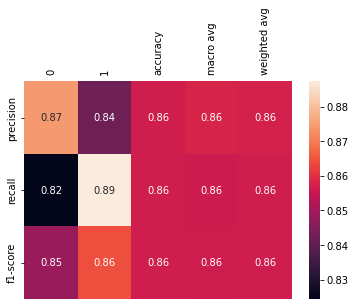

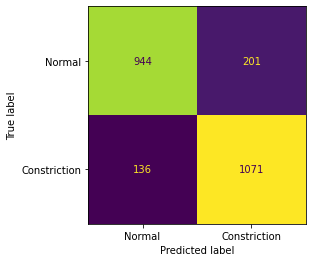

In [12]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rep = classification_report(Y_test,rf_predict,output_dict=True)
print(rep)
plt.tick_params(labelbottom = False, bottom=False, labeltop=True)
sns.heatmap(pd.DataFrame(rep).iloc[:-1, :], annot=True)
cm = confusion_matrix(Y_test,rf_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal','Constriction'])
cmd.plot(colorbar=False)


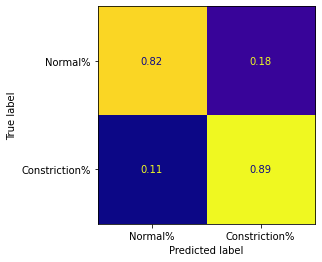

In [15]:
pcm = confusion_matrix(Y_test,rf_predict, normalize='true')
pmd = ConfusionMatrixDisplay(pcm, display_labels=['Normal%','Constriction%'])  
pmd.plot(colorbar=False,cmap='plasma')

Cross_Validation(model evaluation)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_resampled, y_resampled, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.80 (+/- 0.02)


Visualizing Cross validation

In [39]:
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y,ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )
    return ax

<AxesSubplot:>

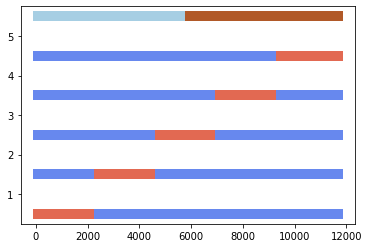

In [43]:
fig, ax = plt.subplots()
cv = KFold(n_splits=5)
plot_cv_indices(cv, X_resampled, y_resampled, ax, n_splits=5)

Train Test split for N iterations (median performance over many trials)

In [ ]:
myscores =[]
itr = 50

for i in range(itr):# itr means the number of iterations
    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)
    rf = RandomForestClassifier(max_depth=30, random_state=0)
    rf.fit(X_train, Y_train)
    rf_predict = rf.predict(X_test)
    rf_acc_score = accuracy_score(Y_test, rf_predict)
    myscores.append(rf_acc_score)
    print(i)


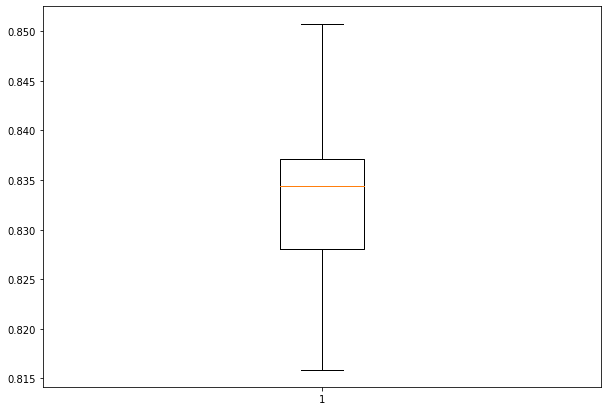

In [70]:
import matplotlib.pyplot as plt # to get median accuracy
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(myscores)
 
# show plot
plt.show()